<a href="https://colab.research.google.com/github/SaniyaChavan07/Heart-Disease-Prediction/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Percentage of Female Patients:31.68%
Percentage of Male Patients:68.32%


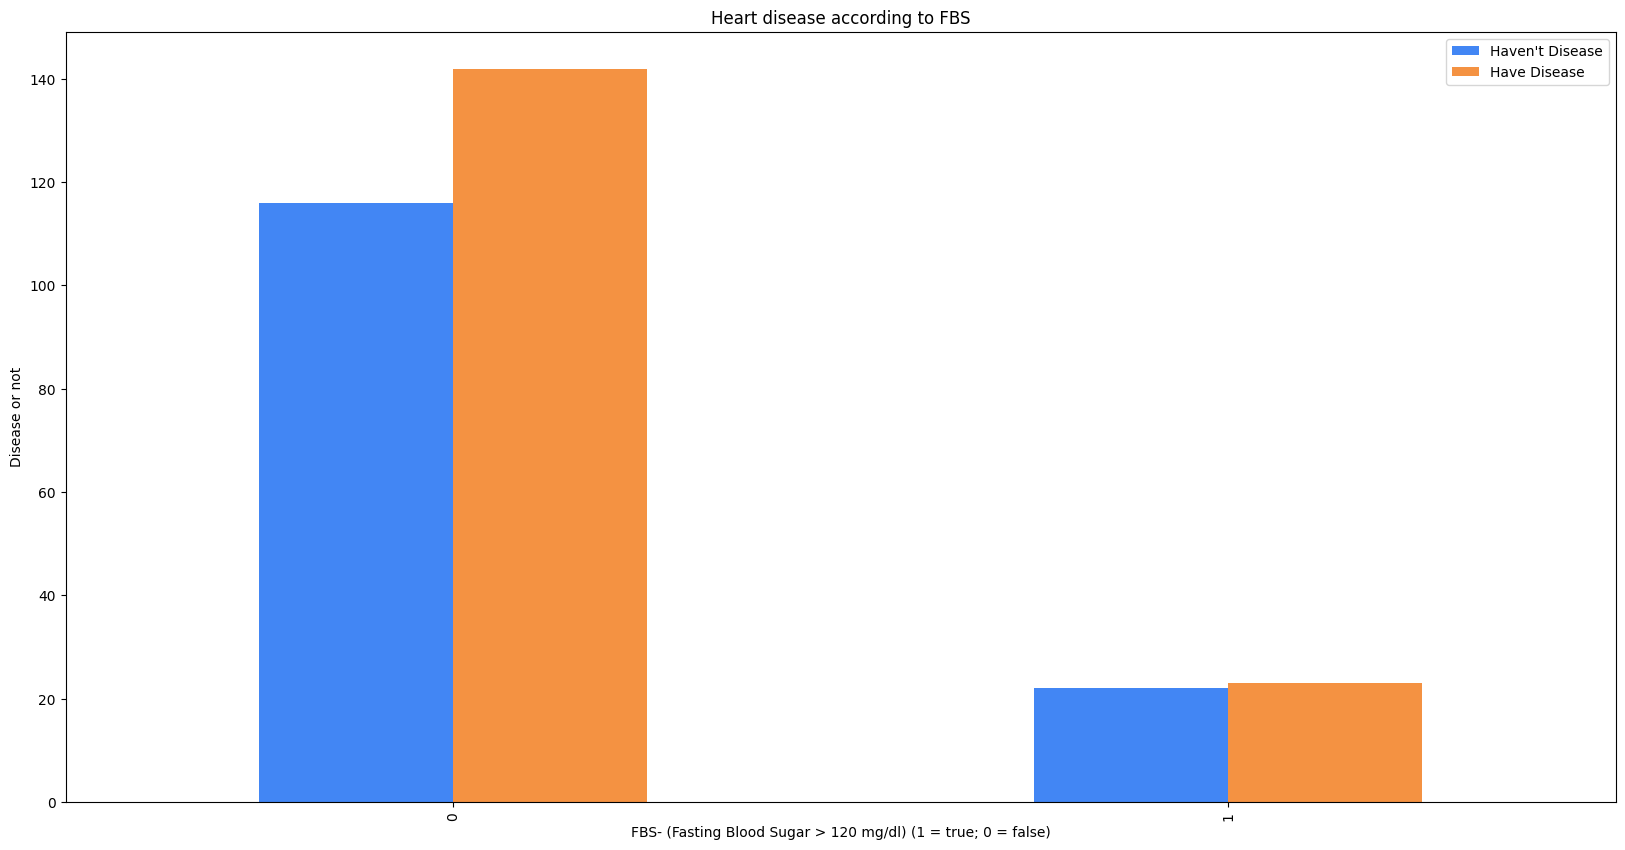

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("heart.csv")
data.head()
countFemale = len(data[data.sex == 0])
countMale = len(data[data.sex == 1])
print("Percentage of Female Patients:{:.2f}%".format((countFemale)/(len(data.sex))*100))
print("Percentage of Male Patients:{:.2f}%".format((countMale)/(len(data.sex))*100))
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']
pd.crosstab(data.fasting_blood_sugar,data.target).plot(kind="bar",figsize=(20,10),color=['#4286f4','#f49242'])
plt.title("Heart disease according to FBS")
plt.xlabel('FBS- (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation=90)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Disease or not')
plt.show()


Training features have 242 records and Testing features have 61 records.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Training set score: 0.847
Test set score: 0.852
The accuracy score achieved using Logistic Regression is: 85.25 %
Precision:  0.8522788686723114
Recall is:  0.8524590163934426
0.8523689330143458


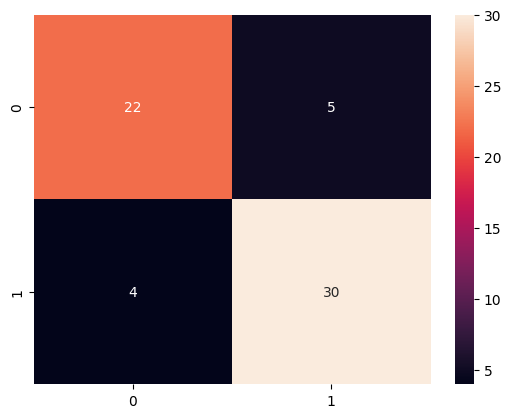

In [ ]:
#Logistic R
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("heart.csv")

predictors = data.drop("target",axis=1)
target = data["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)
print("Training features have {0} records and Testing features have {1} records.".\
      format(X_train.shape[0], X_test.shape[0]))
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(X_train, Y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, Y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, Y_test)))
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")
from sklearn.metrics import confusion_matrix


matrix= confusion_matrix(Y_test, Y_pred_lr)


sns.heatmap(matrix,annot = True, fmt = "d")
from sklearn.metrics import precision_score
precision = precision_score(Y_test, Y_pred_lr, average='weighted')
print("Precision: ",precision)
from sklearn.metrics import recall_score
recall = recall_score(Y_test, Y_pred_lr, average='weighted')
print("Recall is: ",recall)
print((2*precision*recall)/(precision+recall))


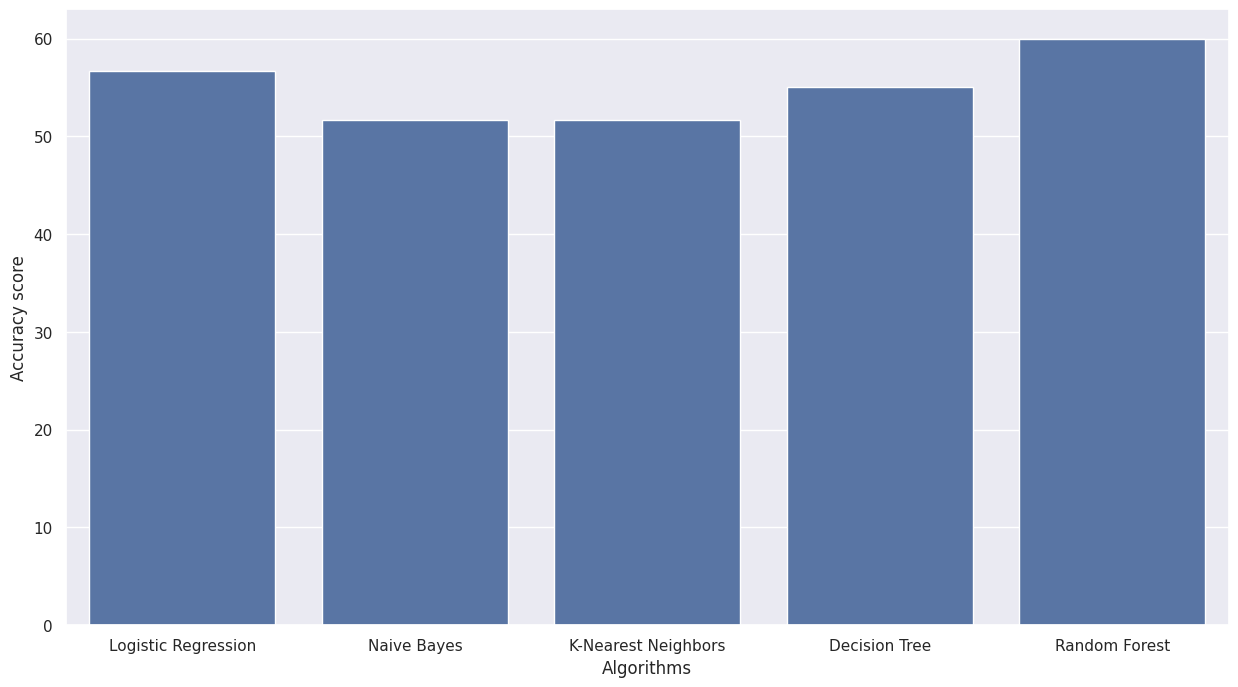

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = {'Algorithm': algorithms, 'Accuracy': scores}
df = pd.DataFrame(data)

sns.set(rc={'figure.figsize':(15,8)})
sns.barplot(x='Algorithm', y='Accuracy', data=df)

plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
plt.show()

Accuracy on training set: 1.000
Accuracy on test set: 0.820
Precision:  0.8248016922263353
Recall is:  0.819672131147541
0.8222289114389295


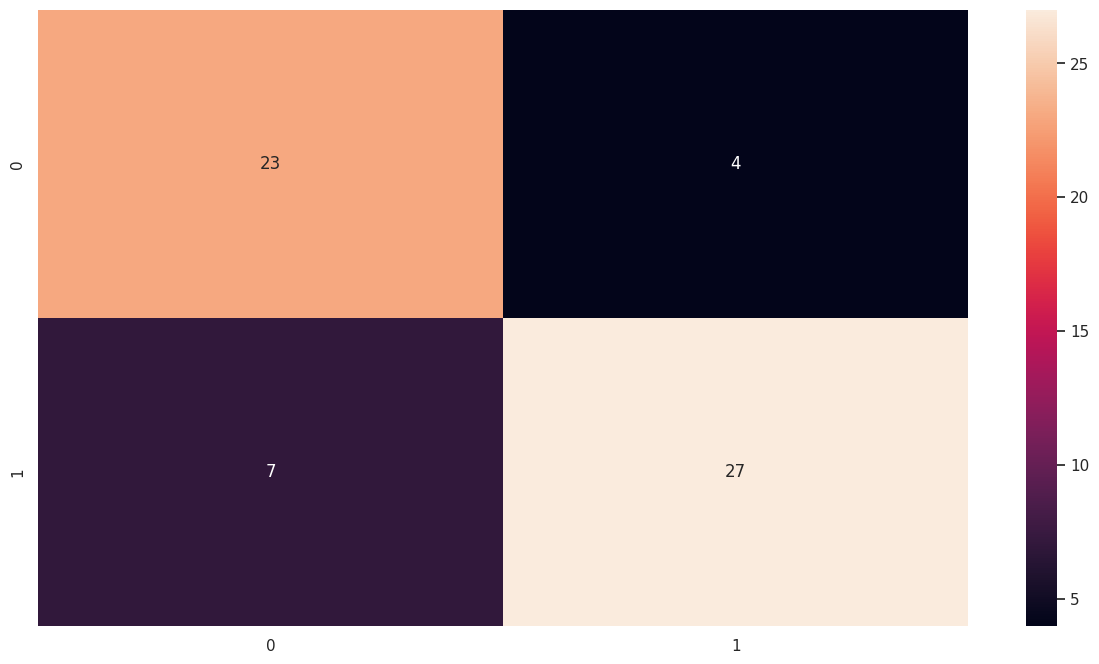

In [ ]:
#Random forest with 20 trees

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=20, random_state=0)
rf.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, Y_test)))

# Predict target values for the test set using the trained Random Forest model
Y_pred_rf = rf.predict(X_test) #This line is added to fix the error

from sklearn.metrics import confusion_matrix
matrix= confusion_matrix(Y_test, Y_pred_rf)
sns.heatmap(matrix,annot = True, fmt = "d")
from sklearn.metrics import precision_score
precision = precision_score(Y_test, Y_pred_rf, average='weighted')
print("Precision: ",precision)
from sklearn.metrics import recall_score
recall = recall_score(Y_test, Y_pred_rf, average='weighted')
print("Recall is: ",recall)
print((2*precision*recall)/(precision+recall))

In [ ]:
#Decision Tree
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("/heart.csv")

from sklearn.tree import DecisionTreeClassifier
tree1 = DecisionTreeClassifier(random_state=0)
tree1.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(tree1.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(tree1.score(X_test, Y_test)))

from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0
for x in range(20):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)
df = pd.read_csv('/heart.csv')
df.head()
from pandas import DataFrame, Series
from IPython.display import Image
from io import StringIO
import pydotplus
from sklearn import preprocessing

from sklearn import tree
from sklearn.metrics import confusion_matrix


matrix= confusion_matrix(Y_test, Y_pred_dt)


#sns.heatmap(matrix,annot = True, fmt = "d")
from pandas import DataFrame, Series
from IPython.display import Image
from io import StringIO
import pydotplus
from sklearn import preprocessing
def plot_decision_tree(clf, feature_name, target_name):
    dot_data = StringIO()
    tree.export_graphviz(clf, out_file=dot_data,
                         feature_names=feature_name,
                         class_names=['0', '1'], # Changed from target_name to a list of class labels
                         filled=True, rounded=True,
                         special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return Image(graph.create_png())
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)


plot_decision_tree(clf, X_train.columns,df.columns[1])


Accuracy on training set: 1.000
Accuracy on test set: 0.787


FileNotFoundError: [Errno 2] No such file or directory: '/heart.csv'